# HW 11

16.6 Homework

Write a program to find the minimum of $$ f(x,y) = x^2/2 + y^2/3 - xy/4 $$
1. from your own code (except Monte Carlo)
2. from scipy

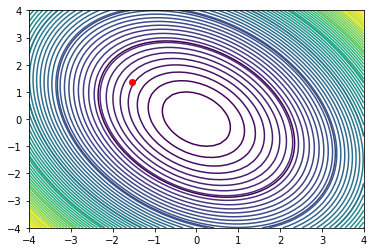

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -4, 4
y_min, y_max = -4, 4
A, B, C = 1/2, 1/3, 1/4

def f1(x):
    return A*x[0]**2 + B*x[1]**2 + C*x[0]*x[1]
    

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return x0, y0               

nx = np.linspace(x_min,x_max)
ny = np.linspace(y_min,y_max)

x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')

plt.show()

In [3]:
def partial_derive(f, xy, d=0.001):
    x, y = xy[0], xy[1]
    fx = (f([x+d/2,y])-f([x-d/2,y]))/d      # derivative w/respect to x, hold y constant
    fy = (f([x,y+d/2])-f([x,y-d/2]))/d      # derivative w/respect to y, hold x constant
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_var(f,x0, N=1000):
    
    x_now = x0
    x_prev = None
    converged = False
    x_hist = []
    x_hist.append(x_now)
    
    for i in range(N):
        
        df_now = partial_derive(f1, x_now) 
        
        if x_prev is None:
            dx = 0.01
            
        else:
            df_prev = partial_derive(f1, x_prev)
            dd = df_now - df_prev
            dx = np.dot(x_now - x_prev, dd) / (np.linalg.norm(dd))**2
        x_next = x_now - df_now*dx
        
        print("step: ", f(x_now), f(x_next))
        
        if f(x_next)>f(x_now):
            converged = True
            break
            
        else:
            x_prev = x_now
            x_now = x_next
            x_hist.append(x_now)

    return converged, np.array(x_hist), f(x_now)

step:  6.986031972141738 6.88230997568434
step:  6.88230997568434 0.9645777240177283
step:  0.9645777240177283 0.17789740454813052
step:  0.17789740454813052 0.011323729993474895
step:  0.011323729993474895 0.000979597237901749
step:  0.000979597237901749 0.0003357399251464016
step:  0.0003357399251464016 7.82649299855637e-07
step:  7.82649299855637e-07 2.1659378465003783e-07
step:  2.1659378465003783e-07 7.853167008645691e-10
step:  7.853167008645691e-10 1.2427493508272857e-14
step:  1.2427493508272857e-14 1.580070856831773e-14


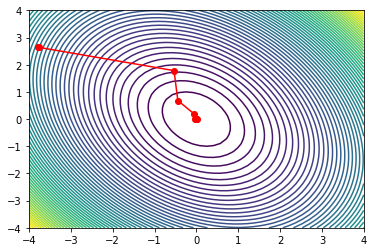

results of f_min:  1.2427493508272857e-14   number of iterations:   11
[-3.78339622  2.64347107] 6.986031972141738
[1.30535309e-07 6.98745724e-08] 1.2427493508272857e-14


In [4]:
[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_var(f1, [x0,y0])
x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)

plt.plot(x_hist[:,0], x_hist[:,1], 'ro-')
plt.show()

print('results of f_min: ', f_min, '  number of iterations:  ', len(x_hist))
print(x_hist[0], f1(x_hist[0]))
print(x_hist[-1], f1(x_hist[-1]))

In [103]:
# using scipy
from scipy.optimize import minimize

[x0, y0] = init(x_min, x_max, y_min, y_max)

res = minimize(f1, [x0,y0], method='nelder-mead', tol=1e-4, options={'disp': True})

print('')

# conjugate gradient
res = minimize(f1, [x0,y0], method='CG', tol=1e-4, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 45
         Function evaluations: 87

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 40
         Gradient evaluations: 10


# Lennard-Jones Potential
17.5 Homework
Write a program to find the ground state of LJ potential for N=3 (assuming $\epsilon$ = $\sigma$ = 1)

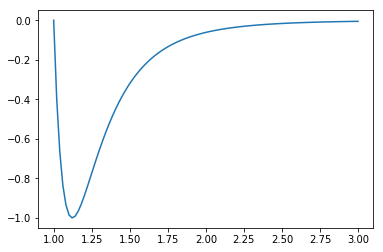

Minimum value is:  -2.8536308805650425


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

r = np.linspace(1.0,3.0,100)
plt.plot(r, LJ(r))
plt.show()

# calculate distances between N=3 atoms
def distance_form(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def calc_min_LJP(Nsimulations):
    
    energy_totals = []
    
    for i in range(Nsimulations):
        
        # position of atom 1
        x1 = 5*np.random.random()
        y1 = 5*np.random.random()
        
        # position of atom 2
        x2 = 5*np.random.random()
        y2 = 5*np.random.random()
        
        # position of atom 3
        x3 = 5*np.random.random()
        y3 = 5*np.random.random()
        
        # distances between atoms 1, 2, and 3
        r1 = distance_form(x1,y1,x2,y2)
        r2 = distance_form(x1,y1,x3,y3)
        r3 = distance_form(x2,y2,x3,y3)
        
        # calculate min energy using LJ potental between each atoms
        E1 = LJ(r1)
        E2 = LJ(r2)
        E3 = LJ(r3)
        
        total_E = E1 + E2 + E3
        
        energy_totals.append(total_E)
    
    return min(energy_totals)

print('Minimum value is: ',calc_min_LJP(10000))